In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = w.get_health_data('Record')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269523 entries, 0 to 2269522
Data columns (total 11 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   @type                             object
 1   @sourceName                       object
 2   @sourceVersion                    object
 3   @unit                             object
 4   @creationDate                     object
 5   @startDate                        object
 6   @endDate                          object
 7   @value                            object
 8   MetadataEntry                     object
 9   @device                           object
 10  HeartRateVariabilityMetadataList  object
dtypes: object(11)
memory usage: 190.5+ MB


In [5]:
clean_df = w.clean_records_list(df)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267590 entries, 0 to 2269522
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   activity_type        object
 1   source               object
 2   source_ver           object
 3   unit_of_measure      object
 4   creation_time        object
 5   activity_start_time  object
 6   activity_end_time    object
 7   value                object
 8   device               object
dtypes: object(9)
memory usage: 173.0+ MB


In [7]:
records_list = w.records_list_time_zone_fun(clean_df)

In [8]:
records_list

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time
date,,,,,,,,,
2007-03-06,BodyMass,健康,15.5,kg,121.4,NaN,0,16:25,16:25
2007-03-06,Height,健康,15.5,cm,191.0,NaN,0,16:26,16:26
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.00144,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:48,18:54
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.25881,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:21,18:26
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.00276,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:15,18:21
...,...,...,...,...,...,...,...,...,...
2022-12-08,HeartRate,Mark的Apple Watch,9.1,count/min,98.0,"<<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...",0,07:28,07:28
2022-12-08,DistanceWalkingRunning,Mark的Apple Watch,9.1,km,0.004358,"<<HKDevice: 0x2833fc050>, name:Apple Watch, ma...",0,07:28,07:28
2022-12-08,BasalEnergyBurned,Mark的Apple Watch,9.1,Cal,0.083,"<<HKDevice: 0x2833b8e10>, name:Apple Watch, ma...",0,07:28,07:28


In [9]:
records_list.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2267590 entries, 2007-03-06 to 2022-12-08
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   activity_type    object
 1   source           object
 2   source_ver       object
 3   unit_of_measure  object
 4   value            object
 5   device           object
 6   in_china         uint8 
 7   start_time       object
 8   end_time         object
dtypes: object(8), uint8(1)
memory usage: 157.9+ MB


In [10]:
records_list.activity_type.value_counts()

StepCount                         650299
ActiveEnergyBurned                529598
DistanceWalkingRunning            302735
BasalEnergyBurned                 270744
HeartRate                         237855
WalkingSpeed                       38954
WalkingStepLength                  38951
AppleExerciseTime                  37130
WalkingDoubleSupportPercentage     31306
AppleStandTime                     28282
WalkingAsymmetryPercentage         18394
FlightsClimbed                     15171
EnvironmentalAudioExposure         14127
HeadphoneAudioExposure             11075
AppleStandHour                      7273
RespiratoryRate                     5656
SleepAnalysis                       5070
OxygenSaturation                    3239
HeartRateVariabilitySDNN            2587
StairDescentSpeed                   2235
StairAscentSpeed                    1654
DietaryEnergyConsumed               1341
DietaryCarbohydrates                1283
DietaryFatTotal                     1256
DietarySugar    

In [11]:
step_counts = records_list[records_list['activity_type'] == 'StepCount']

In [12]:
step_counts.unit_of_measure.value_counts()

count    650299
Name: unit_of_measure, dtype: int64

In [13]:
step_counts.value = step_counts.value.astype(int)

In [18]:
daily_steps = step_counts['2020/08'].resample('D')[['value']].sum()

<AxesSubplot:xlabel='date'>

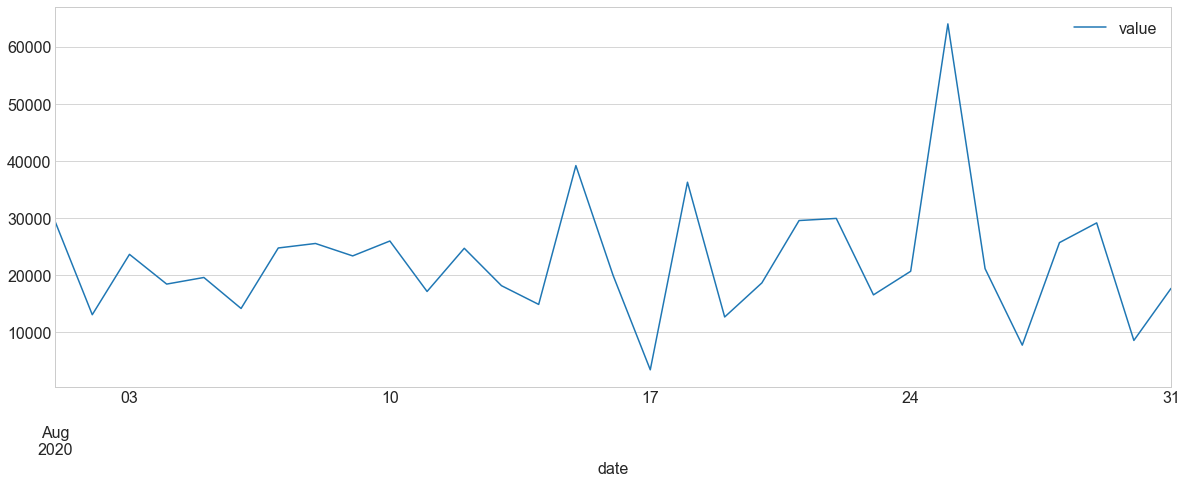

In [19]:
daily_steps.plot()

<AxesSubplot:xlabel='date'>

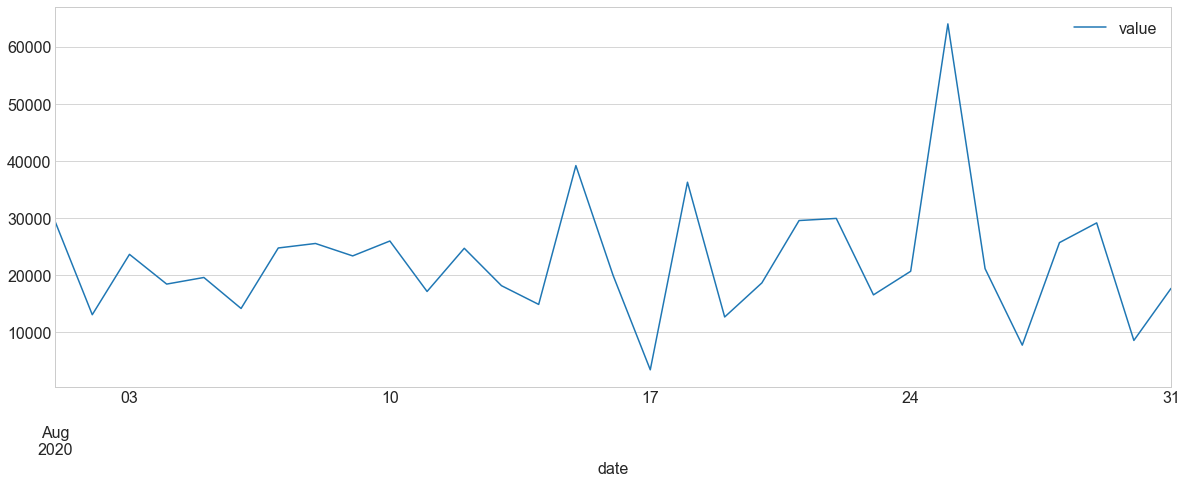

In [20]:
daily_steps['2020/08'].plot()

In [21]:
step_counts['2020-08-25':'2020-08-25']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time
date,,,,,,,,,
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39
2020-08-25,StepCount,Marky Doug,13.6.1,count,10,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39
...,...,...,...,...,...,...,...,...,...
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:12,14:12
2020-08-25,StepCount,Marky Doug,13.6.1,count,51,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:11,14:11
2020-08-25,StepCount,Marky Doug,13.6.1,count,4,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:10,14:10
